In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create time series data

In [3]:
records = 30
ts = pd.date_range(start='1/1/2018', periods=records)
a = np.random.randint(0,100, size=records)
b = a + np.random.randint(-50,50, size=records)
df = pd.DataFrame({'ts':ts, 'a':a, 'b':b})
df.head()

,a,b,ts
0,63,14,2018-01-01
1,67,28,2018-01-02
2,91,74,2018-01-03
3,96,86,2018-01-04
4,74,111,2018-01-05


## Rolling mean

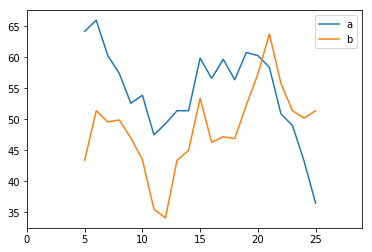

In [4]:
df[['a','b']].rolling(center=True, window=10).mean().plot()
plt.show()

## Rolling correlation

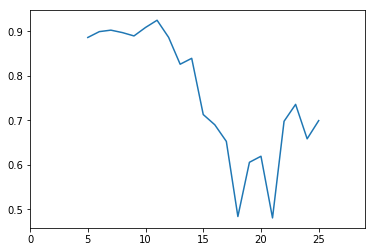

In [5]:
df['a'].rolling(center=True, window=10).corr(other=df['b']).plot()
plt.show()

## Cross correlation and Auto correlation
Cross correlation is correlation in different offset points between two variables. Use cases for cross correlation:
* Find similarities between two time series
* Find exact offset between two time series values

Auto correlation would be exactly same, but there the same variable would be used twice. Use cases for auto correlation:
* Detect periodical sequences in time series
* Find the exact amplitude of the sequence

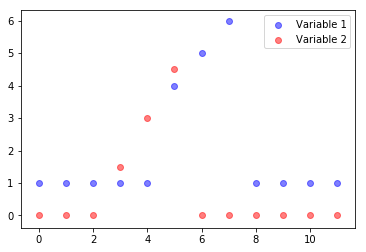

In [79]:
#Create two variables. They correlate perfectly, when cc_1 is shifted two steps left.
cc_1 = [1,1,1,1,1,4,5,6,1,1,1,1]
cc_2 = [0,0,0,1.5,3,4.5,0,0,0,0,0,0]

cc_x = range(len(cc_1))

plt.scatter(cc_x, cc_1, alpha=0.5, color="blue", label="Variable 1")
plt.scatter(cc_x, cc_2, alpha=0.5, color="red", label="Variable 2")
plt.legend()
plt.show()

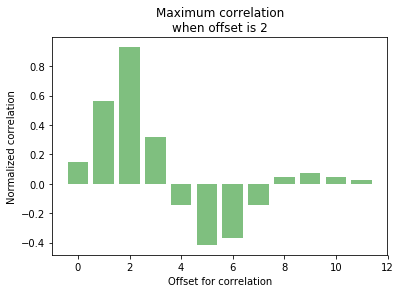

In [80]:
#Numpy doesn't standardize automatically
cc_1_norm = (cc_1 - np.mean(cc_1))/(np.std(cc_1) * len(cc_1))
cc_2_norm = (cc_2 - np.mean(cc_2))/np.std(cc_2)

cross_corr = np.correlate(cc_1_norm, cc_2_norm, "full")[len(cc_1)-1:]

plt.bar(cc_x, cross_corr, alpha=0.5, color="green", label="Cross Correlation Offset")
plt.xlabel('Offset for correlation')
plt.ylabel('Normalized correlation')
plt.title('Maximum correlation\nwhen offset is 2')
plt.show()

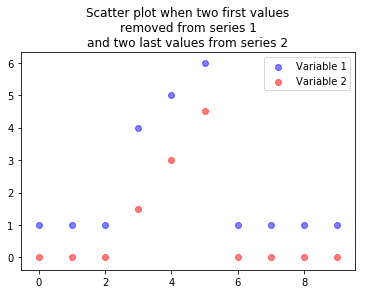

In [81]:
#Create two variables. They correlate perfectly, when cc_1 is shifted two steps left.
cc_1 = [1,1,1,4,5,6,1,1,1,1]
cc_2 = [0,0,0,1.5,3,4.5,0,0,0,0]

cc_x = range(len(cc_1))

plt.scatter(cc_x, cc_1, alpha=0.5, color="blue", label="Variable 1")
plt.scatter(cc_x, cc_2, alpha=0.5, color="red", label="Variable 2")
plt.legend()
plt.title('Scatter plot when two first values\nremoved from series 1\nand two last values from series 2')
plt.show()